# <span style="color: yellow;">Unzip files

In [179]:
import warnings
warnings.filterwarnings('ignore')

import os
os.system("gunzip ./data/*.gz")

gzip: ./data/*.gz: No such file or directory


256

# <span style="color: yellow;">Read CSV files and convert then into DataFrames

In [180]:
import pandas as pd
df_adverseEffects=pd.read_csv("./data/adverseEffects.tsv", sep="\t")
df_molecules=pd.read_csv("./data/molecules.tsv", sep="\t")

# <span style="color: yellow;">Data example of the adverseEffects

In [181]:
df_adverseEffects.head(10)

,chembl_id,event,count,llr,critval,meddraCode
0,1200632,acute generalised exanthematous pustulosis,17,34.023707,14.12231,10048799.0
1,1200632,anal ulcer,5,16.650804,14.12231,10002180.0
2,1200632,antibiotic level below therapeutic,5,24.306048,14.12231,10061643.0
3,1200632,calcium deficiency,5,16.746305,14.12231,10006956.0
4,1200632,clostridium difficile infection,17,27.814871,14.12231,10054236.0
5,1200632,drug hypersensitivity,322,672.816988,14.12231,10013700.0
6,1200632,drug reaction with eosinophilia and systemic s...,20,23.353399,14.12231,10073508.0
7,1200632,fall,1,15.625790,14.12231,10016173.0
8,1200632,fatigue,7,21.481770,14.12231,10016256.0
9,1200632,gastrointestinal mucosa hyperaemia,5,22.067790,14.12231,10076398.0


In [182]:
df_adverseEffects['count'].values

array([17,  5,  5, ...,  5, 11,  2], shape=(115126,))

# <span style="color: yellow;">Check the data distribution using count and llr values to determine how to apply count information 

<Axes: xlabel='count', ylabel='llr'>

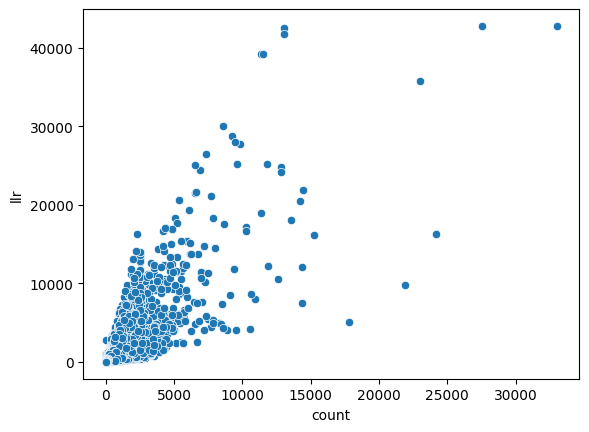

In [183]:
import seaborn as sns
sns.scatterplot(data=df_adverseEffects, x="count", y="llr" )

# <span style="color: yellow;">Normality test of the count and llr for correlation test (Both data do not follow normal distribution => non-parametric)

In [184]:
import pingouin as pg
pg.normality(df_adverseEffects["count"].values)

,W,pval,normal
0,0.204488,1.863732e-180,False


In [185]:
pg.normality(df_adverseEffects["llr"].values)

,W,pval,normal
0,0.187349,3.348755e-181,False


In [186]:
df_adverseEffects.describe()

,chembl_id,count,llr,critval,meddraCode
count,1.151260e+05,115126.000000,115126.000000,115126.000000,1.147100e+05
mean,1.142251e+06,103.019935,192.090476,42.281509,1.003547e+07
std,1.336208e+06,428.665555,837.910363,114.539555,2.221507e+04
min,2.000000e+00,1.000000,4.037756,2.235425,1.000003e+07
25%,1.429000e+03,5.000000,12.403746,6.508260,1.001608e+07
50%,1.200339e+06,11.000000,26.842705,9.783916,1.003472e+07
75%,1.743049e+06,48.000000,90.340725,29.092192,1.005243e+07
max,5.315126e+06,33002.000000,42747.781312,3737.315512,1.008482e+07


# <span style="color: yellow;">Spearman test (Non-parametric test) shows high correlation between count and llr => We can assume the lrr reflect the count information

In [187]:
pg.corr(df_adverseEffects["count"].values,df_adverseEffects["llr"].values, method="spearman").round(3)

,n,r,CI95%,p-val,power
spearman,115126,0.875,"[0.87, 0.88]",0.0,1.0


# <span style="color: yellow;">Get adjusted llr by subtracting critval from llr

In [188]:
df_adverseEffects_new=pd.DataFrame({"chembl_id":df_adverseEffects["chembl_id"].values, "converted_llr":df_adverseEffects["llr"].values-df_adverseEffects["critval"].values})

In [189]:
df_adverseEffects_new["chembl_id"]="CHEMBL"+df_adverseEffects_new["chembl_id"].apply(str)

In [190]:
df_adverseEffects_new

,chembl_id,converted_llr
0,CHEMBL1200632,19.901398
1,CHEMBL1200632,2.528494
2,CHEMBL1200632,10.183739
3,CHEMBL1200632,2.623995
4,CHEMBL1200632,13.692561
...,...,...
115121,CHEMBL474579,5.713319
115122,CHEMBL474579,10.254068
115123,CHEMBL474579,1.201809
115124,CHEMBL474579,44.864676


# <span style="color: yellow;">Generate AdverseEffect dictionary with minimum adjusted LLR value

In [191]:
adverseEffects_dict=df_adverseEffects_new.groupby('chembl_id')['converted_llr'].apply(list).apply(min).apply(lambda x : round(x, 3)).to_dict()

In [192]:
len(adverseEffects_dict)

3728

# <span style="color: yellow;">Processing molecule information

In [193]:
df_molecules.head(10)

,id,canonicalSmiles,inchiKey,drugType,blackBoxWarning,name,yearOfFirstApproval,maximumClinicalTrialPhase,parentId,hasBeenWithdrawn,isApproved,tradeNames,synonyms,crossReferences,childChemblIds,linkedDiseases,linkedTargets,description
0,CHEMBL110739,C[C@]12C[C@H](O)[C@H]3[C@@H](CCC4=CC(=O)CC[C@@...,OMFXVFTZEKFJBZ-HJTSIMOOSA-N,Small molecule,False,CORTICOSTERONE,NaN,3.0,NaN,False,False,[],"['11-b,21-Dihydroxypregn-3,20-dione' '17-Deoxy...","[('PubChem', array(['144204430', '144208564', ...",NaN,"{'rows': array(['EFO_1000786'], dtype=object),...",[],Small molecule drug with a maximum clinical tr...
1,CHEMBL1195,CCCOc1cc(N)ccc1C(=O)OCCN(CC)CC,CAJIGINSTLKQMM-UHFFFAOYSA-N,Small molecule,False,PROPOXYCAINE,1982.0,4.0,NaN,False,True,[],['Propoxycaine'],"[('PubChem', array(['11112410'], dtype=object)...",['CHEMBL1769'],NaN,"[ENSG00000144285,ENSG00000183873,ENSG000000073...",Small molecule drug with a maximum clinical tr...
2,CHEMBL1200632,CCCCCCCCCCCCCCCC(=O)O[C@@H]1[C@@H](O)[C@@H](O)...,GTNDZRUWKHDICY-DJHAJVGHSA-N,Small molecule,True,CLINDAMYCIN PALMITATE HYDROCHLORIDE,1986.0,4.0,CHEMBL1201289,False,True,['Cleocin' 'Clindamycin palmitate hydrochloride'],['Clindamycin palmitate hcl' 'Clindamycin palm...,"[('DailyMed', array(['clindamycin%20palmitate%...",NaN,"{'rows': array(['EFO_0000544', 'EFO_0003102'],...",[],Small molecule drug with a maximum clinical tr...
3,CHEMBL1200691,CC(=O)[O-].CC(=O)[O-].[Mg+2],UEGPKNKPLBYCNK-UHFFFAOYSA-L,Small molecule,False,MAGNESIUM ACETATE,NaN,4.0,NaN,False,True,[],"['Acetic acid, magnesium salt' 'Magnesium acet...","[('DrugCentral', array(['4489'], dtype=object)...",['CHEMBL3989858'],NaN,[],Small molecule drug with a maximum clinical tr...
4,CHEMBL121790,Cc1cccc(-c2nn3c(c2-c2ccc(F)cc2)CCC3)n1,NBDZLUOYAAVYHF-UHFFFAOYSA-N,Small molecule,False,CHEMBL121790,NaN,NaN,NaN,False,NaN,[],[],"[('drugbank', array(['DB04480'], dtype=object))]",NaN,NaN,[],Small molecule drug.
5,CHEMBL1231,CCN(CC)CC#CCOC(=O)C(O)(c1ccccc1)C1CCCCC1,XIQVNETUBQGFHX-UHFFFAOYSA-N,Small molecule,False,OXYBUTYNIN,1975.0,4.0,NaN,False,True,['Anturol' 'Contimin 2.5' 'Contimin 5' 'Cystri...,['Ditropan' 'Oxybutynin'],"[('DailyMed', array(['oxybutynin'], dtype=obje...",['CHEMBL1133'],"{'rows': array(['EFO_0006865', 'EFO_1000781', ...","[ENSG00000133019,ENSG00000181072]",Small molecule drug with a maximum clinical tr...
6,CHEMBL1231592,CC(C)CCC[C@@H](C)[C@H]1CC[C@H]2[C@@H]3CC=C4C[C...,BHYOQNUELFTYRT-DPAQBDIFSA-N,Small molecule,False,CHEMBL1231592,NaN,NaN,NaN,False,NaN,[],[],"[('drugbank', array(['DB01990'], dtype=object)...",['CHEMBL4475544'],NaN,[],Small molecule drug.
7,CHEMBL1232182,OCc1cccc(F)c1F,JSFGDUIJQWWBGY-UHFFFAOYSA-N,Small molecule,False,"2,3-Difluorobenzyl Alcohol",NaN,NaN,NaN,False,NaN,[],"['2,3-Difluorobenzyl Alcohol']","[('drugbank', array(['DB04312'], dtype=object)...",NaN,NaN,[],Small molecule drug.
8,CHEMBL1233511,O=P(O)(O)O[C@H]1[C@H](OP(=O)(O)O)[C@@H](OP(=O)...,IMQLKJBTEOYOSI-GPIVLXJGSA-N,Small molecule,False,PHYTIC ACID,NaN,3.0,NaN,False,False,[],['Alkalovert' 'Dermofeel pa-3' 'E391' 'Exfoder...,"[('drugbank', array(['DB14981'], dtype=object)...",['CHEMBL3989600' 'CHEMBL2106435'],"{'rows': array(['EFO_0002950'], dtype=object),...",[],Small molecule drug with a maximum clinical tr...
9,CHEMBL1234904,Nc1ncc(C(=O)c2cccc(Br)c2)o1,YDCMMVTWXORJGO-UHFFFAOYSA-N,Small molecule,False,CHEMBL1234904,NaN,NaN,NaN,False,NaN,[],[],"[('drugbank', array(['DB08314'], dtype=object))]",NaN,NaN,[],Small molecule drug.


# <span style="color: yellow;">Filter out the rows containing empty targets

In [194]:
df_molecules_filtered=df_molecules[df_molecules['linkedTargets'].apply(lambda x: x!="[]")]

In [195]:
df_molecules_filtered.head(10)

,id,canonicalSmiles,inchiKey,drugType,blackBoxWarning,name,yearOfFirstApproval,maximumClinicalTrialPhase,parentId,hasBeenWithdrawn,isApproved,tradeNames,synonyms,crossReferences,childChemblIds,linkedDiseases,linkedTargets,description
1,CHEMBL1195,CCCOc1cc(N)ccc1C(=O)OCCN(CC)CC,CAJIGINSTLKQMM-UHFFFAOYSA-N,Small molecule,False,PROPOXYCAINE,1982.0,4.0,NaN,False,True,[],['Propoxycaine'],"[('PubChem', array(['11112410'], dtype=object)...",['CHEMBL1769'],NaN,"[ENSG00000144285,ENSG00000183873,ENSG000000073...",Small molecule drug with a maximum clinical tr...
5,CHEMBL1231,CCN(CC)CC#CCOC(=O)C(O)(c1ccccc1)C1CCCCC1,XIQVNETUBQGFHX-UHFFFAOYSA-N,Small molecule,False,OXYBUTYNIN,1975.0,4.0,NaN,False,True,['Anturol' 'Contimin 2.5' 'Contimin 5' 'Cystri...,['Ditropan' 'Oxybutynin'],"[('DailyMed', array(['oxybutynin'], dtype=obje...",['CHEMBL1133'],"{'rows': array(['EFO_0006865', 'EFO_1000781', ...","[ENSG00000133019,ENSG00000181072]",Small molecule drug with a maximum clinical tr...
14,CHEMBL1637,Cl.Nc1ccn([C@@H]2O[C@H](CO)[C@@H](O)C2(F)F)c(=...,OKKDEIYWILRZIA-OSZBKLCCSA-N,Small molecule,False,GEMCITABINE HYDROCHLORIDE,1996.0,4.0,CHEMBL888,False,True,['Gemcitabine hydrochloride' 'Gemzar' 'Infugem'],['Gemcitabine (as hydrochloride)' 'Gemcitabine...,"[('DailyMed', array(['gemcitabine%20hydrochlor...",NaN,"{'rows': array(['MONDO_0008170', 'MONDO_000862...","[ENSG00000101868,ENSG00000175482,ENSG000000775...",Small molecule drug with a maximum clinical tr...
18,CHEMBL1743017,NaN,NaN,Antibody,False,FEZAKINUMAB,NaN,2.0,NaN,False,False,[],['Fezakinumab' 'ILV-094'],NaN,NaN,"{'rows': array(['EFO_0000676', 'EFO_0000274', ...",[ENSG00000127318],Antibody drug with a maximum clinical trial ph...
25,CHEMBL2104927,CN(CCc1cc(C(F)(F)F)cc(C(F)(F)F)c1)C(=O)[C@H](c...,HUTHJVYJUPXHDF-DEOSSOPVSA-N,Small molecule,False,FIGOPITANT,NaN,2.0,NaN,False,False,[],['BIIF 1149 BS' 'BIIF 1149 CL' 'BIIF-1149 BS' ...,"[('drugbank', array(['DB12122'], dtype=object))]",['CHEMBL3542235'],NaN,[ENSG00000115353],Small molecule drug with a maximum clinical tr...
26,CHEMBL2105675,CNC[C@H](O)[C@@H](O)[C@H](O)[C@H](O)CO.O=C(O)c...,DQJDBUPLRMRBAB-WZTVWXICSA-N,Small molecule,False,TAFAMIDIS MEGLUMINE,2011.0,4.0,CHEMBL2103837,False,True,['Vyndaqel'],['FX-1006A' 'Tafamidis meglumine'],"[('DailyMed', array(['tafamidis%20meglumine'],...",NaN,"{'rows': array(['EFO_1001875', 'EFO_0009562', ...",[ENSG00000118271],Small molecule drug with a maximum clinical tr...
28,CHEMBL2107826,O=C(Nc1ccc(C[C@@H]2CC[C@H]([C@H](O)c3ccccc3)N2...,DJXRIQMCROIRCZ-XOEOCAAJSA-N,Small molecule,False,VIBEGRON,2018.0,4.0,NaN,False,True,['Gemtesa'],['KRP-114V' 'Mk4618' 'Vibegron'],"[('drugbank', array(['DB14895'], dtype=object))]",NaN,"{'rows': array(['EFO_0006865', 'HP_0000020', '...",[ENSG00000188778],Small molecule drug with a maximum clinical tr...
30,CHEMBL2109177,NaN,NaN,Antibody,False,ODULIMOMAB,NaN,3.0,NaN,False,False,[],['Afolimomab' 'Odulimomab' 'anti-LFA1'],NaN,NaN,NaN,[ENSG00000005844],Antibody drug with a maximum clinical trial ph...
34,CHEMBL2346976,CC(=O)N1CCN(CCOc2ccc(C3CCN(C4=Nn5c(nnc5C(F)(F)...,JMEYDSHPKCSIJC-UHFFFAOYSA-N,Small molecule,False,AZD3514,NaN,1.0,NaN,False,False,[],['AZD-3514' 'Azd 3514' 'Azd3514' 'CS-1443'],NaN,NaN,"{'rows': array(['MONDO_0008315'], dtype=object...",[ENSG00000169083],Small molecule drug with a maximum clinical tr...
47,CHEMBL3545096,COc1ccc(-c2ccc3ncc4c(c3c2)n(-c2ccc(N3CCNCC3)c(...,YUXMAKUNSXIEKN-BTJKTKAUSA-N,Small molecule,False,BGT-226,NaN,2.0,CHEMBL3218578,False,False,[],['BGT226' 'Bgt-226' 'NVP-BGT-226' 'NVP-BGT226'],"[('chEBI', array(['71953'], dtype=object))]",NaN,"{'rows': array(['MONDO_0016063', 'MONDO_000499...","[ENSG00000198793,ENSG00000145675,ENSG000000513...",Small molecule drug with a maximum clinical tr...


# <span style="color: yellow;">Convert the linkedTargets data into a list format

In [196]:
df_sub_molecules=df_molecules_filtered[['linkedTargets', 'id']]

In [197]:
df_sub_molecules['linkedTargets']=df_sub_molecules['linkedTargets'].apply(lambda x: x[1:-1].split(',') if x else [])

In [198]:
type(df_sub_molecules.iloc[0,0])

list

In [199]:
df_sub_molecules

,linkedTargets,id
1,"[ENSG00000144285, ENSG00000183873, ENSG0000000...",CHEMBL1195
5,"[ENSG00000133019, ENSG00000181072]",CHEMBL1231
14,"[ENSG00000101868, ENSG00000175482, ENSG0000007...",CHEMBL1637
18,[ENSG00000127318],CHEMBL1743017
25,[ENSG00000115353],CHEMBL2104927
...,...,...
18018,[ENSG00000088926],CHEMBL4112929
18025,"[ENSG00000169252, ENSG00000133019]",CHEMBL4297483
18026,[ENSG00000131981],CHEMBL4297577
18030,[ENSG00000188389],CHEMBL4594536


# <span style="color: yellow;">Calculate the number of targets for each drug and generate dictionary data

In [200]:
df_molecule_target_dict=df_sub_molecules.set_index('id')['linkedTargets'].apply(len).to_dict()

In [201]:
len(df_molecule_target_dict)

4987

# <span style="color: yellow;">Generate dictionary data with EnsemblID as the key and target drug IDs as the value in list format

In [202]:
df_sub_molecule_expanded=df_sub_molecules.explode('linkedTargets')

In [203]:
df_sub_molecule_expanded

,linkedTargets,id
1,ENSG00000144285,CHEMBL1195
1,ENSG00000183873,CHEMBL1195
1,ENSG00000007314,CHEMBL1195
1,ENSG00000136546,CHEMBL1195
1,ENSG00000136531,CHEMBL1195
...,...,...
18025,ENSG00000169252,CHEMBL4297483
18025,ENSG00000133019,CHEMBL4297483
18026,ENSG00000131981,CHEMBL4297577
18030,ENSG00000188389,CHEMBL4594536


In [204]:
dict_sub_molecule_grouped=df_sub_molecule_expanded.groupby('linkedTargets')['id'].apply(list).to_dict()

# <span style="color: yellow;">Make dictionary data with {EnsemblID: {'DrugID: (number of targets, adjusted LLR),...}  example: {'ENSG00000000938': {'CHEMBL1980297': (18, 0.124)}

In [205]:
dict_sub_molecule_grouped_converted={}

for key, val in dict_sub_molecule_grouped.items():
    
    val_dict={}
    for chembl in val:
        
        if chembl in df_molecule_target_dict:
            num_target=df_molecule_target_dict[chembl]
        else:
            num_target="nd"
            
        if chembl in adverseEffects_dict:
            AE_llr=adverseEffects_dict[chembl]
        else:
            AE_llr="nd"
        val_dict[chembl]=(num_target, AE_llr)    
    dict_sub_molecule_grouped_converted[key]=val_dict

# <span style="color: yellow;">Visualize the distribution of the drugs based on the number of targets and adjusted LRR

{'CHEMBL940': (26, 0.421), 'CHEMBL1534525': (3, 'nd'), 'CHEMBL539770': (31, 'nd'), 'CHEMBL45816': (3, 'nd'), 'CHEMBL473159': (26, 0.001), 'CHEMBL797': (3, 'nd'), 'CHEMBL404849': (26, 'nd'), 'CHEMBL593430': (26, 'nd'), 'CHEMBL2103836': (26, 'nd'), 'CHEMBL1684950': (3, 'nd'), 'CHEMBL1059': (26, 10.2), 'CHEMBL4217292': (3, 'nd'), 'CHEMBL697': (3, 0.375), 'CHEMBL1628502': (26, 0.004), 'CHEMBL695': (3, 'nd'), 'CHEMBL1100': (3, 'nd'), 'CHEMBL1200382': (26, 1.534), 'CHEMBL696': (3, 0.031), 'CHEMBL1008': (26, 0.258), 'CHEMBL363295': (31, 'nd')}


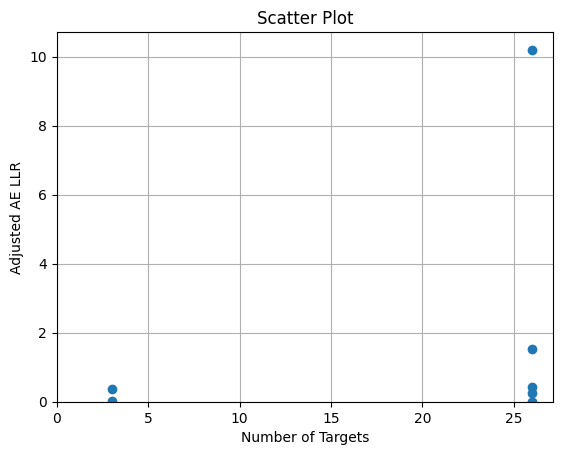

In [206]:
import matplotlib.pyplot as plt
def ScatterPlot_target_AE(dic_data: dict, target_name: str) -> None:

    target_data=dic_data[target_name]
    print(target_data)
    df_target=pd.DataFrame.from_dict(target_data, orient='index')
    df_target=df_target[df_target.iloc[:,1] !="nd"]
    
    plt.scatter(df_target.iloc[:,0], df_target.iloc[:,1])
    plt.xlabel('Number of Targets')
    plt.ylabel('Adjusted AE LLR')
    plt.title('Scatter Plot')
    plt.grid(True)
    plt.xlim(left=0)
    plt.ylim(bottom=0)    
    plt.show()



ScatterPlot_target_AE(dict_sub_molecule_grouped_converted, 'ENSG00000006283')

# <span style="color: yellow;">Compare the number of drug data that contains the number of target data or adverse effect data using a Venn Diagram.

In [207]:
from matplotlib_venn import venn2


### <span style="color: red;">A total of 2830 drugs didn't have adverse effect data, and 1571 didn't have adverse effect data. A total of 2157 drugs had both data.

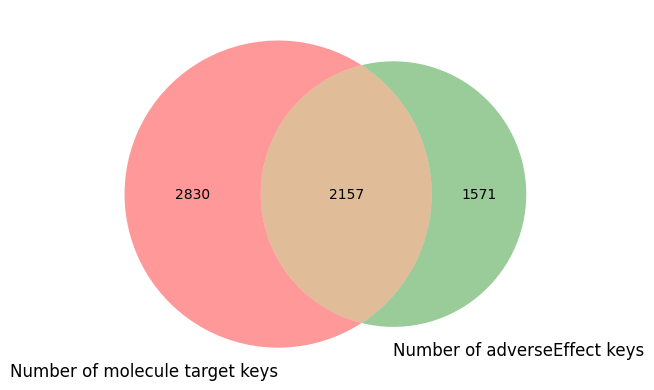

In [208]:
set1 = set(df_molecule_target_dict.keys())
set2 = set(adverseEffects_dict.keys())

# Create the diagram
venn2([set1, set2], set_labels=('Number of molecule target keys', 'Number of adverseEffect keys' ))
plt.show()


# <span style="color: yellow;">Histograms for adjusted LRR and number of targets to determine the necessity of scaling

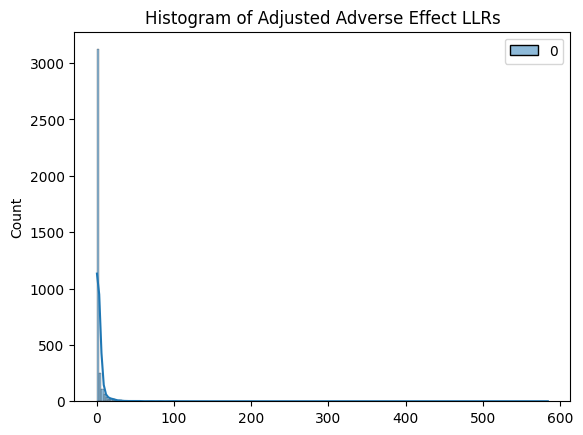

In [209]:
sns.histplot(adverseEffects_dict.values(), bins=200, edgecolor='black', alpha=0.5, kde=True)
# plt.xlim(0,7)
plt.title('Histogram of Adjusted Adverse Effect LLRs')
plt.show()


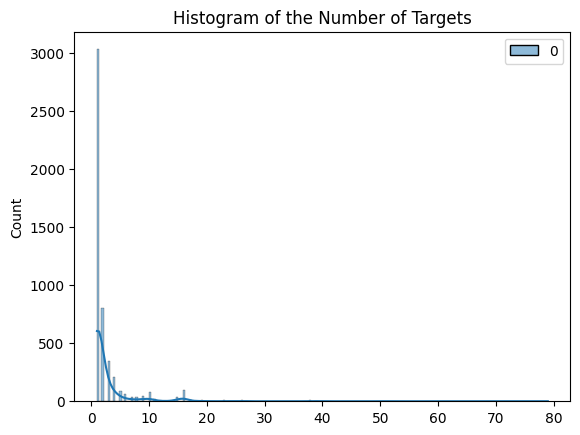

In [210]:
sns.histplot(df_molecule_target_dict.values(), bins=200, edgecolor='black', alpha=0.5, kde=True)
plt.title('Histogram of the Number of Targets')
# plt.xlim(0,30)
plt.show()

# <span style="color: yellow;">Histograms for adjusted LRR and number of targets with 90% of data to remove outliers => The distribution of the two datasets is very similar


Max Adjusted LLR: 5.435



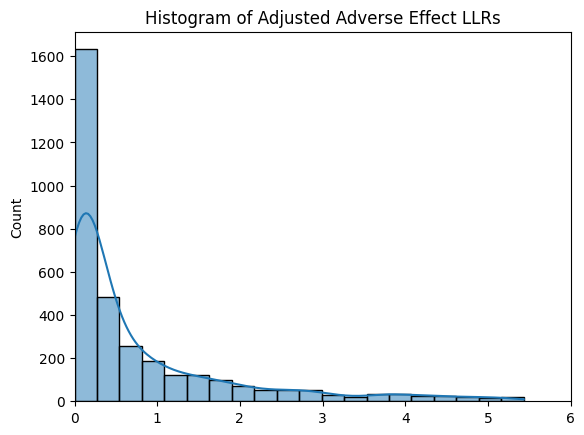

In [211]:
slice_point=int(len(sorted(list(adverseEffects_dict.values())))*0.9)

print(f"\nMax Adjusted LLR: {sorted(list(adverseEffects_dict.values()))[slice_point-1]}\n")
sns.histplot(sorted(list(adverseEffects_dict.values()))[:slice_point], bins=20, edgecolor='black', alpha=0.5, kde=True)
plt.xlim(0,6)
plt.title('Histogram of Adjusted Adverse Effect LLRs')
plt.show()




Max target number: 6



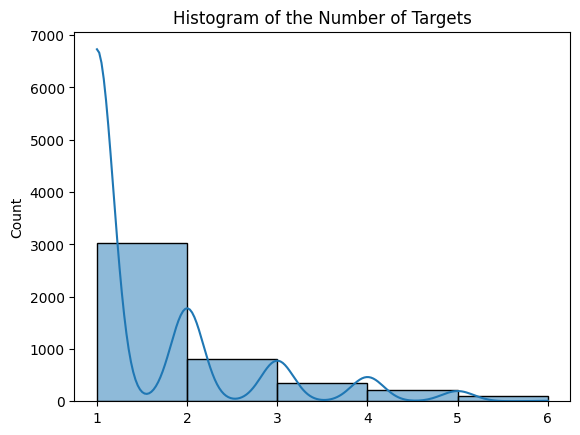

In [212]:
slice_point=int(len(list(df_molecule_target_dict.values()))*0.9)

print(f"\nMax target number: {sorted(list(df_molecule_target_dict.values()))[slice_point-1]}\n")
sns.histplot(sorted(list(df_molecule_target_dict.values()))[:slice_point], bins=5, edgecolor='black', alpha=0.5, kde=True)
plt.title('Histogram of the Number of Targets')
# plt.xlim(0,30)
plt.show()

# <span style="color: yellow;">Generate a DataFrame with the target (EnsemblID) and value(dictionary data for drugID wigh target number and adjusted LLR) to build a database

In [213]:
# final_target_df_for_db=pd.DataFrame.from_dict(dict_sub_molecule_grouped_converted, orient="index")

final_target_df_for_db=pd.DataFrame({'target':list(dict_sub_molecule_grouped_converted.keys()), 'value':list(dict_sub_molecule_grouped_converted.values())})


In [214]:
final_target_df_for_db

,target,value
0,ENSG00000000938,"{'CHEMBL1980297': (18, 'nd'), 'CHEMBL52885': (..."
1,ENSG00000001626,"{'CHEMBL4298128': (1, 'nd'), 'CHEMBL4297849': ..."
2,ENSG00000002549,"{'CHEMBL2103847': (19, 0.006)}"
3,ENSG00000002726,"{'CHEMBL2105233': (2, 'nd')}"
4,ENSG00000003400,"{'CHEMBL197672': (12, 'nd')}"
...,...,...
1551,ENSG00000278540,"{'CHEMBL3989947': (2, 'nd'), 'CHEMBL4567446': ..."
1552,ENSG00000278731,"{'CHEMBL2109498': (8, 'nd'), 'CHEMBL2109500': ..."
1553,ENSG00000282608,"{'CHEMBL1200578': (10, 0.005), 'CHEMBL477': (4..."
1554,ENSG00000292332,"{'CHEMBL4297837': (2, 'nd'), 'CHEMBL3990038': ..."


In [225]:
with open("Target_list_all.txt", 'w') as target:
    target.write("\n".join(list(final_target_df_for_db['target'].values)))

# <span style="color: yellow;">Generate a DataFrame with drug ID and its information to build a database

In [215]:
df_molecules_filtered.columns.values

array(['id', 'canonicalSmiles', 'inchiKey', 'drugType', 'blackBoxWarning',
       'name', 'yearOfFirstApproval', 'maximumClinicalTrialPhase',
       'parentId', 'hasBeenWithdrawn', 'isApproved', 'tradeNames',
       'synonyms', 'crossReferences', 'childChemblIds', 'linkedDiseases',
       'linkedTargets', 'description'], dtype=object)

In [216]:
str_converted_content=[]
for cont in list(df_molecules_filtered.iloc[:,1:].values):
    str_converted_content.append("_|_".join(map(str, list(cont))))

final_molecule_df_for_db=pd.DataFrame({'drug':list(df_molecules_filtered.iloc[:,0].values), 'content':str_converted_content})

In [217]:
final_molecule_df_for_db

,drug,content
0,CHEMBL1195,CCCOc1cc(N)ccc1C(=O)OCCN(CC)CC_|_CAJIGINSTLKQM...
1,CHEMBL1231,CCN(CC)CC#CCOC(=O)C(O)(c1ccccc1)C1CCCCC1_|_XIQ...
2,CHEMBL1637,Cl.Nc1ccn([C@@H]2O[C@H](CO)[C@@H](O)C2(F)F)c(=...
3,CHEMBL1743017,nan_|_nan_|_Antibody_|_False_|_FEZAKINUMAB_|_n...
4,CHEMBL2104927,CN(CCc1cc(C(F)(F)F)cc(C(F)(F)F)c1)C(=O)[C@H](c...
...,...,...
4982,CHEMBL4112929,C[C@@H]1CCC[C@H](n2cnc(-c3cc(Cl)ccc3-n3cc(Cl)n...
4983,CHEMBL4297483,CN(CCCn1nnc2cc(CNC[C@H](O)c3ccc(O)c4[nH]c(=O)c...
4984,CHEMBL4297577,nan_|_nan_|_Unknown_|_False_|_BELAPECTIN_|_nan...
4985,CHEMBL4594536,nan_|_nan_|_Unknown_|_False_|_CS-1003_|_nan_|_...


## <span style="color: yellow;">Add header information to the DataFrame

In [218]:
new_row=pd.DataFrame({'drug':"header", "content":[list(df_molecules_filtered.columns.values)[1:]]})

final_molecule_df_for_db=pd.concat([final_molecule_df_for_db, new_row], ignore_index=True)


In [219]:
final_molecule_df_for_db

,drug,content
0,CHEMBL1195,CCCOc1cc(N)ccc1C(=O)OCCN(CC)CC_|_CAJIGINSTLKQM...
1,CHEMBL1231,CCN(CC)CC#CCOC(=O)C(O)(c1ccccc1)C1CCCCC1_|_XIQ...
2,CHEMBL1637,Cl.Nc1ccn([C@@H]2O[C@H](CO)[C@@H](O)C2(F)F)c(=...
3,CHEMBL1743017,nan_|_nan_|_Antibody_|_False_|_FEZAKINUMAB_|_n...
4,CHEMBL2104927,CN(CCc1cc(C(F)(F)F)cc(C(F)(F)F)c1)C(=O)[C@H](c...
...,...,...
4983,CHEMBL4297483,CN(CCCn1nnc2cc(CNC[C@H](O)c3ccc(O)c4[nH]c(=O)c...
4984,CHEMBL4297577,nan_|_nan_|_Unknown_|_False_|_BELAPECTIN_|_nan...
4985,CHEMBL4594536,nan_|_nan_|_Unknown_|_False_|_CS-1003_|_nan_|_...
4986,CHEMBL5314421,CCOc1cc(CN2CCOCC2)cc2[nH]c(=O)c3c(c12)NCCC3.Cl...


# <span style="color: yellow;">Save the DataFrames as CSV files.

In [220]:
final_target_df_for_db.to_csv("./data_processed/Target_to_drugs_AE.csv", index=False)

In [221]:
final_molecule_df_for_db.to_csv("./data_processed/Filtered_molecules.csv", index=False)